# Задача: Знайти найдовшу спільну підпослідовність (LCS) за алгоритмом Хаббарда

## Контрольні питання

1. **У чому полягає задача знаходження найдовшої спільної підпослідовності (LCS)?**  
   Задача полягає у пошуку максимальної за довжиною підпослідовності, яка одночасно є підпослідовністю для обох заданих послідовностей символів.

2. **Які головні методи можна використовувати для знаходження найдовшої спільної підпослідовності?**  
   Основні методи — це динамічне програмування, алгоритм Хаббарда та рекурсивні підходи з мемоізацією.

3. **Як працює алгоритм динамічного програмування для знаходження LCS?**  
   Він створює матрицю, де кожен елемент dp[i][j] зберігає довжину LCS для підпослідовностей довжиною i та j відповідно, поступово заповнюючи її на основі порівняння символів.

4. **Як працює алгоритм Хаббарда для знаходження LCS?**  
   Алгоритм Хаббарда оптимізує стандартний метод динамічного програмування, зменшуючи використання пам’яті та покращуючи швидкодію за допомогою поділу задачі та злиття результатів.

5. **Які переваги та недоліки алгоритмів динамічного програмування та Хаббарда для знаходження LCS?**  
   - ДП простий у реалізації, але потребує багато пам’яті.  
   - Хаббард ефективніший по пам’яті і швидкості, але складніший для розуміння та реалізації.

6. **Які існують практичні застосування для задачі знаходження найдовшої спільної підпослідовності?**  
   Вирівнювання послідовностей у біоінформатиці, порівняння текстів, системи контролю версій, аналіз даних.

---

## Реалізація пошуку LCS (динамічне програмування)



In [5]:

def lcs_dp(a, b):
    n, m = len(a), len(b)
    dp = [[0] * (m + 1) for _ in range(n + 1)]


    for i in range(n):
        for j in range(m):
            if a[i] == b[j]:
                dp[i + 1][j + 1] = dp[i][j] + 1
            else:
                dp[i + 1][j + 1] = max(dp[i][j + 1], dp[i + 1][j])


    i, j = n, m
    lcs = []
    while i > 0 and j > 0:
        if a[i - 1] == b[j - 1]:
            lcs.append(a[i - 1])
            i -= 1
            j -= 1
        elif dp[i - 1][j] >= dp[i][j - 1]:
            i -= 1
        else:
            j -= 1
    lcs.reverse()
    return ''.join(lcs), dp


a = "ACBDGH"
b = "AEDFHR"

result, dp_matrix = lcs_dp(a, b)
print("Найдовша спільна підпослідовність:", result)


Найдовша спільна підпослідовність: ADH


## Візуалізація цього коду

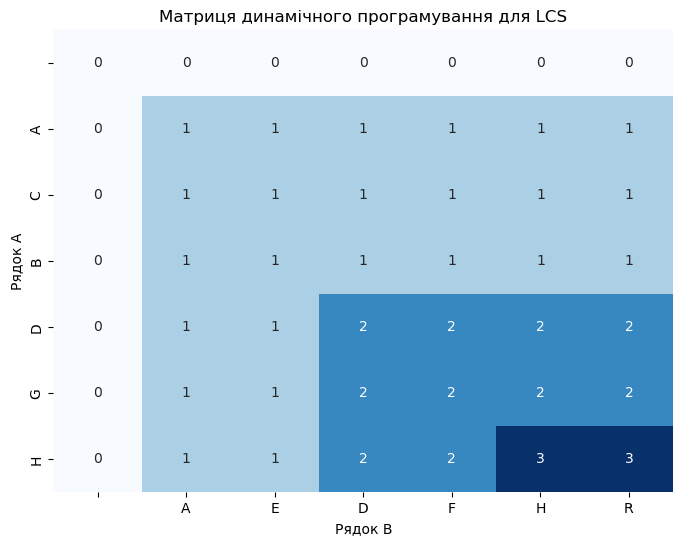

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def plot_lcs_matrix(dp, a, b):
    data = np.array(dp)
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, cmap="Blues", fmt="d", cbar=False,
                xticklabels=[""] + list(b),
                yticklabels=[""] + list(a))
    plt.title("Матриця динамічного програмування для LCS")
    plt.xlabel("Рядок B")
    plt.ylabel("Рядок A")
    plt.show()


plot_lcs_matrix(dp_matrix, a, b)